<a href="https://colab.research.google.com/github/GuiSegabinassi/Dados-League-of-Legends/blob/main/An%C3%A1lise_League_Of_Legends2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
%matplotlib inline


In [ ]:
filename = 'games.csv'
spells = 'summoner_spell_info.json'
def load_data(file):
    return pd.read_csv(file)

In [ ]:
games_full = load_data(filename)


In [ ]:
games_train,games_test = train_test_split(games_full,test_size=0.3,random_state=42)

In [ ]:
games_train.head()

In [ ]:
games_train.info()

In [ ]:
games_train.isnull().sum()

In [ ]:
games_train.describe()

In [ ]:
games_train['winner'].value_counts()

O time 1 venceu 50,56% das partidas
O time 2 venceu 49,44% das partidas

In [ ]:
games_train['firstBlood'].value_counts()

In [ ]:
games_train['firstTower'].value_counts()

In [ ]:
games_train['firstDragon'].value_counts()

In [ ]:
games_train['firstBaron'].value_counts()

In [ ]:
games_train['firstInhibitor'].value_counts()

In [ ]:
sns.countplot(x = 'firstDragon', data=games_train)

In [ ]:
sns.countplot(x = 'winner', data=games_train, hue='firstDragon')

In [ ]:
sns.countplot(x = 'winner', data=games_train, hue='firstBlood')

In [ ]:
sns.countplot(x = 'winner', data=games_train, hue='firstTower')

In [ ]:
sns.countplot(x = 'winner', data=games_train, hue='firstBaron')

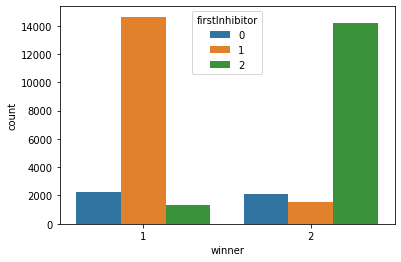

In [11]:
sns.countplot(x = 'winner', data=games_train, hue='firstInhibitor')

Agora vamos comparar esses diferentes recursos

Todos esses recursos estão altamente relacionados com o time que venceu a partida

levando em consideração partidas fora do cenario competitivo, em partidas de Soloq o primeiro barão não parece tão importante para uma equive atingir a vitoria, porém devemos levar em consideração o tempo dessas partidas já que esse objetivo não aparece no mapa antes dos 20 minutos de jogo 

Podemos ver também que o primeiro abate não é tão importante como os outros objetivos

In [ ]:
corr_matrix = games_train.corr()

In [ ]:
corr_matrix['winner'].sort_values(ascending=False)

In [ ]:
sns.countplot(x='t2_towerKills', data = games_train, hue='winner')

In [ ]:
sns.countplot(x='t1_towerKills', data = games_train, hue='winner')

In [ ]:
sum_157_1 = 0
sum_157_2 = 0
for i in range(1,3):
    for j in range(1,6):
        if i == 1:
            sum_157_1 += games_train[games_train['t' + str(i) + '_ban' + str(j)] == 157]['t' + str(i) + '_ban' + str(j)].value_counts()
        else:
            sum_157_2 += games_train[games_train['t' + str(i) + '_ban' + str(j)] == 157]['t' + str(i) + '_ban' + str(j)].value_counts()

print('Team 1 banned 157 %s times.' % str(sum_157_1))
print('Team 2 banned 157 %s times.' % str(sum_157_2))

In [ ]:
games_train['gameDuration'] = games_train['gameDuration'].apply(lambda x: x/60)

In [ ]:
games_train['gameDuration'].hist()

In [ ]:
tower = games_train[['firstInhibitor', 'winner']]

In [ ]:
winner_1 = 18223
winner_2 = 17820

In [ ]:
(tower[games_train['firstInhibitor']==1][games_train['winner']==1].sum()['winner']/winner_1) * 100

<ipython-input-21-aedc4fbe51d4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (tower[games_train['firstInhibitor']==1][games_train['winner']==1].sum()['winner']/winner_1) * 100


80.31059649892993

In [ ]:
def calc_win_percent(team,feature,data,winner):
    win = data[[feature,'winner']]
    if team == 1:
        win = (win[data[feature] == team][data['winner']==team].sum()['winner']/winner) * 100
    else:
        win = ((win[data[feature] == team][data['winner']==team].sum()/2)['winner']/winner) * 100
    return win

In [ ]:
first_tower_win_1 = calc_win_percent(1,'firstTower',games_train,winner_1)

In [ ]:
first_features = []
features = ['firstTower','firstBlood','firstInhibitor','firstDragon','firstBaron']
firstTower_win1 = calc_win_percent(1,'firstTower',games_train,winner_1)
first_features.append(firstTower_win1)

firstTower_win2 = calc_win_percent(2,'firstTower',games_train,winner_2)
first_features.append(firstTower_win2)

firstBlood_win1 = calc_win_percent(1,'firstBlood',games_train,winner_1)
first_features.append(firstBlood_win1)

firstBlood_win2= calc_win_percent(2,'firstBlood',games_train,winner_2)
first_features.append(firstBlood_win2)

firstInhib_win1 = calc_win_percent(1,'firstInhibitor',games_train,winner_1)
first_features.append(firstInhib_win1)

firstInhib_win2 = calc_win_percent(2,'firstInhibitor',games_train,winner_2)
first_features.append(firstInhib_win2)

firstDragon_win1 = calc_win_percent(1,'firstDragon',games_train,winner_1)
first_features.append(firstDragon_win1)

firstDragon_win2 = calc_win_percent(2,'firstDragon',games_train,winner_2)
first_features.append(firstDragon_win2)

firstBaron_win1 = calc_win_percent(1,'firstBaron',games_train,winner_1)
first_features.append(firstBaron_win1)

firstBaron_win2 = calc_win_percent(2,'firstBaron',games_train,winner_2)
first_features.append(firstBaron_win2)

In [ ]:
i =0
while i < len(features):
    print('%s:' % features[i])
    
    print('Team 1 - %s win rate '% first_features[2*i])
    print('Team 2- %s win rate ' % first_features[2*i+1])
    i += 1

In [ ]:
team = [1, 2]
first_team = [first_features[i] for i in range (0, 9, 2)]
second_team = [first_features[1] for i in range (1, 10, 2)]

In [ ]:
win_probability = pd.DataFrame([first_team,second_team],columns=features,index=[team]).reset_index()

In [ ]:
win_probability=win_probability.rename(columns={'level_0':'winner'})

In [ ]:
pos = list(range(len(win_probability['winner'])))

In [ ]:
width = 0.10

Traçando os graficos

In [ ]:
pos = list(range(len(win_probability['winner'])))
width = 0.10


fig,ax= plt.subplots(figsize=(10,5))


plt.bar(pos,
       win_probability['firstTower'],
       width,
       alpha=0.5,
       color ='#DC143C',
       label=win_probability.columns[1])

plt.bar([p + width for p in pos],
       win_probability['firstBlood'],
       width,
       alpha=0.5,
       color ='#FF4500',
       label=win_probability.columns[2])

plt.bar([p + width*2 for p in pos],
       win_probability['firstInhibitor'],
       width,
       alpha=0.5,
       color ='#FFFF00',
       label=win_probability.columns[3])

plt.bar([p + width*3 for p in pos],
       win_probability['firstDragon'],
       width,
       alpha=0.5,
       color ='#0000FF',
       label=win_probability.columns[4])

plt.bar([p + width*4 for p in pos],
       win_probability['firstBaron'],
       width,
       alpha=0.5,
       color ='#ADFF2F',
       label=win_probability.columns[5])

plt.xlim(min(pos)-width, max(pos)+width*5)
ax.set_ylabel('Win Probability')
ax.set_xlabel('Team')
ax.set_title('Probaility of winning from first objective')
ax.set_xticks([p + 2 * width for p in pos])
ax.set_xticklabels(win_probability['winner'])
plt.legend()

In [ ]:
games_train.columns

In [ ]:
study = ['t1_towerKills','t1_inhibitorKills','t1_baronKills','t1_dragonKills','t1_riftHeraldKills','t2_towerKills','t2_inhibitorKills','t2_baronKills','t2_dragonKills','t2_riftHeraldKills']
games_train.groupby('winner')[study].mean()

In [ ]:
sns.countplot(x = 't1_towerKills', data = games_train, hue='winner')

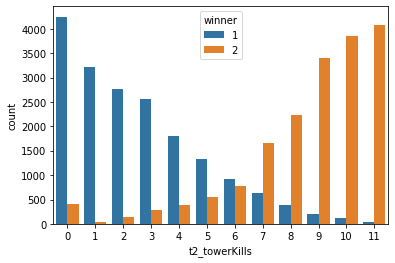

In [ ]:
sns.countplot(x = 't2_towerKills', data = games_train, hue='winner')

League of Legends é um jogo extremamente volátil, há diversos fatores que podemos levar em consideração para determinar o vencedor de uma partida, mas com base nas informações que analisamos podemos chegar as seguintes conclusões:
1- Os primeiros objetivos que cedem ouro global para uma equipe impactam imensamente no resultado final, conquistar a primeira torre o primeiro Dragão e consequentemente o primeiro inibidor aumentar de forma consideravel as chances de vitórias para uma equipe

2- Como nosso querido lolzinho é um jogo de diversas variáveis como número de wards, tempo e composição, conquistar o primeiro abate ou até mesmo o primeiro barão pode não significar grandes chances de vitórias

3- Em média para uma equipe vencer ela precisa conquistar 9 torres, 2 inibidores, pelo menos 2 dragão e 1 barão

Obs: Uma partida de League of Legends dura em média 30 minutos podendo variar pra mais ou pra menos. Devemos sempre levar em consideração que o Barão só nasce a partir dos 20 minutos de jogo e, cada equipe tem como objetivo também conquistar primeiro 4 dragões para ganhar algum atributo global para a sua equipe.

Guilherme Segabinassi da Cunha
